# Seattle bicycle  analysis project - David Kljajo

### Import Fremont Bridge's data into local directory

In [1]:
# import urllib.request as req
# req.urlretrieve('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', 'data/FremontBridge.csv')

### Load Data and  start exploring

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set()

In [5]:
fb = pd.read_csv('D:\\FremontBridge.csv', index_col='Date', parse_dates=True)

In [6]:
print(fb.head(5))
print(fb.tail(5))

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-11-01 00:00:00                  12.0                           7.0   
2019-11-01 01:00:00                   7.0                           0.0   
2019-11-01 02:00:00                   1.0                           0.0   
2019-11-01 03:00:00                   6.0                           6.0   
2019-11-01 04:00:00                   6.0                           5.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-11-01 00:00:00                           5.0  
2019-11-01 01:00:00                           7.0  
2019-11-01 02:00:00                           1.0  
2019-11-01 03:00:00                           0.0  
2019-11-01 04:00:00                           1.0  
                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                               

In [7]:
fb.shape

(143630, 3)

In [8]:
fb.dtypes

Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [10]:
fb.columns = ['East','West', 'Total']
fb.head(5)

,East,West,Total
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [11]:
# fb['Total'] = fb['East'] + fb['West']
fb['Total'] = fb.eval('East + West')
fb.head(5)

,East,West,Total
Date,,,
2019-11-01 00:00:00,12.0,7.0,19.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,12.0
2019-11-01 04:00:00,6.0,5.0,11.0


In [12]:
# Check for null values
fb.isna().sum()

East     22
West     22
Total    22
dtype: int64

In [13]:
fb.dropna(inplace=True)
fb.count()

East     143608
West     143608
Total    143608
dtype: int64

In [14]:
fb.describe()

,East,West,Total
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,161.710350
std,141.443433,65.157096,201.923856
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,20.000000
50%,60.000000,28.000000,89.000000
75%,146.000000,68.000000,215.000000
max,1097.000000,698.000000,1569.000000


Text(0, 0.5, 'Hourly Bicycle Count')

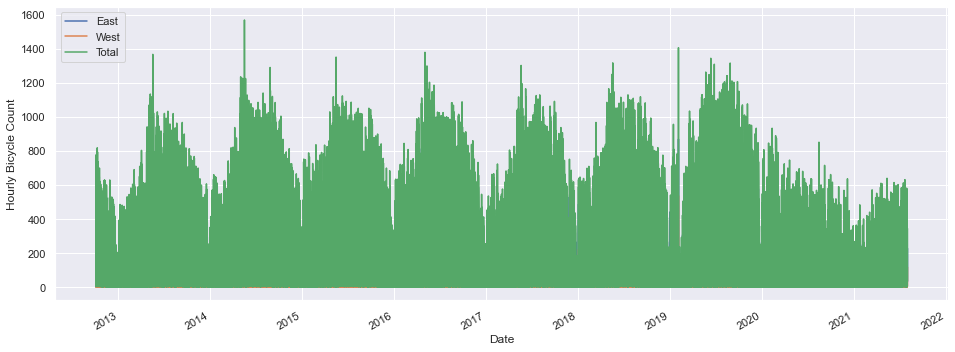

In [15]:
fb.plot(kind='line', figsize=(16,6))
plt.legend(loc='upper left')
plt.ylabel('Hourly Bicycle Count')
# Obsevation: The 30k+ samples are way too dense to make sense, because we hardly see East and West data ata the bottom.

fb_daily size : 9672


Text(0, 0.5, 'Daily Bicycle Count')

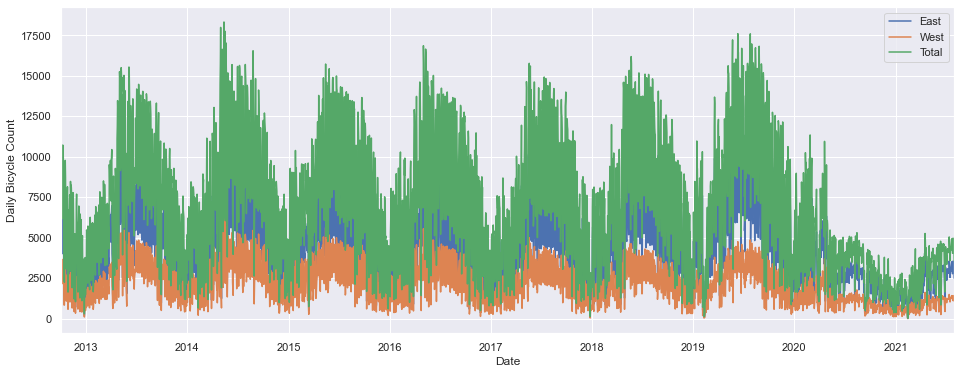

In [16]:
# How about if we resample the data from hourly to daily?
fb_daily = fb.resample('d').sum()
print('fb_daily size :',fb_daily.size)
fb_daily.plot(kind='line', figsize=(16,6))
plt.ylabel('Daily Bicycle Count')
# Observation: It's still dense with daily data.

fb_weekly size : 1383


Text(0, 0.5, 'Weekly Bicycle Count')

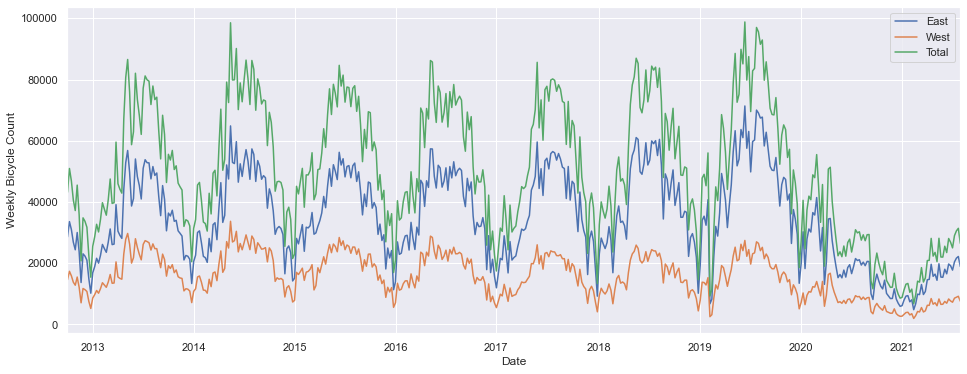

In [17]:
# How about if we resample the data from daily to weekly? 
fb_weekly = fb_daily.resample('W').sum()
print('fb_weekly size :',fb_weekly.size)
fb_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel('Weekly Bicycle Count')
# Observation: Life is better now..for data analysis
# The frequency line varies widely. What do we infer?
# People bicycle more in summer (see the peaks every year in the graph), and than in winter
# Even within a season, there are wide-fluctuations than near-consistency in the counts from one week to another. Why?
# Perhaps because of temperature, precipitation and other factors..

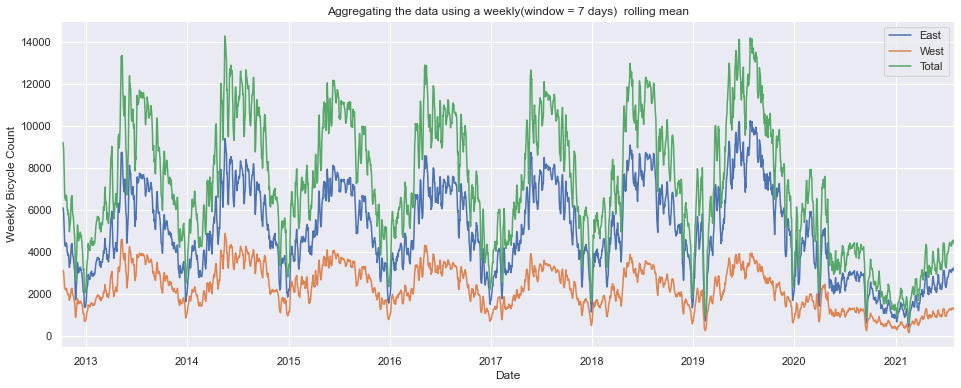

In [18]:
# The same weekly  plot can be pllot from daily dataset like below
fb_daily.rolling(window=7).mean().plot(kind='line', figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()

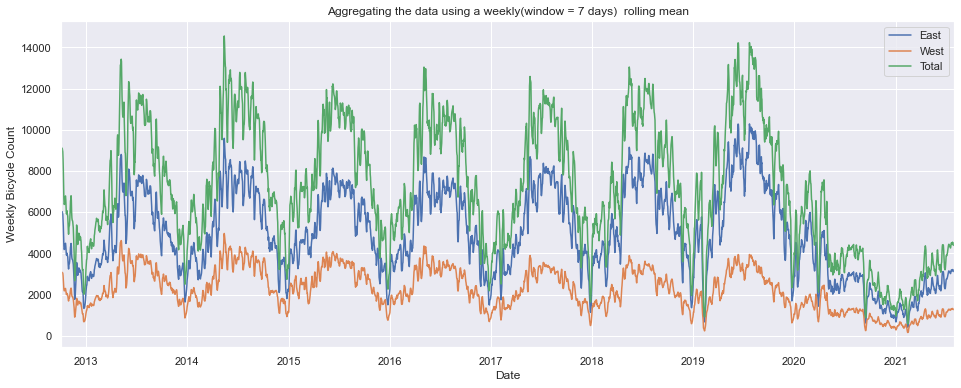

In [19]:
# The jaggedness of the result is due to the hard cutoff of the window. 
# We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.
# The above weekly plot is a little jagged and can be smoothened like below:
# The following code specifies both the width of the window (we chose 7 days) and 
# the width of the Gaussian within the window (we chose 3 days):
fb_daily.rolling(window=7, center=True, win_type='gaussian').mean(std=5).plot(figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()
# Observation: Smoothening isn't really so good in this case, likee how it used to be :-/

Hourly Ticks : [    0  3600  7200 10800 14400 18000 21600 25200 28800 32400 36000 39600
 43200 46800 50400 54000 57600 61200 64800 68400 72000 75600 79200 82800]


(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

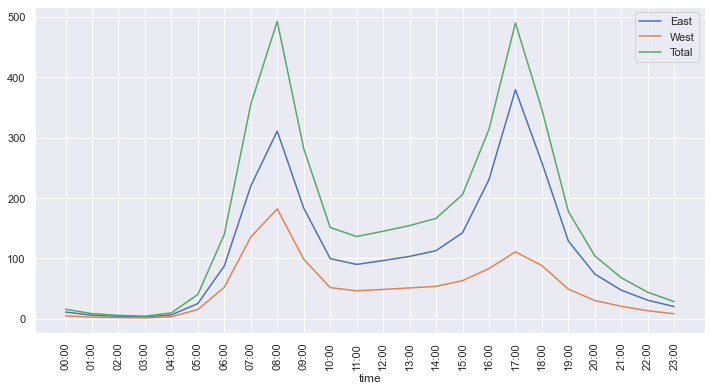

In [20]:
# We might want to look at the average traffic as a function of the time of day.
gby_time = fb.groupby(fb.index.time).mean()
hourly_ticks = 60 * 60 * np.arange(24)
print('Hourly Ticks :', hourly_ticks)
gby_time.plot(xticks=hourly_ticks,figsize=(12,6))
plt.xticks(rotation='vertical')
# Observation: The hourly traffic is a strongly bimodal distribution (do yu see 2 mountains in the graph?), 
# with peaks around 8:00 in the morning and 5:00 in the evening.

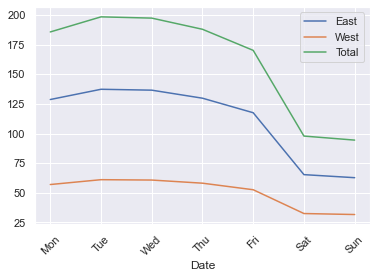

In [21]:
# We also might be curious about how things change based on the day of the week. 
# Again, we can do this with a simple groupby
gby_week = fb.groupby(fb.index.dayofweek).mean()
# print(gby_week)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
# gby_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
gby_week.plot()
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.show()
# Observation: This shows a strong distinction between weekday and weekend totals, 
# with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

In [22]:
weekday_mask = np.where(fb_daily.index.weekday < 5, 'Weekday', 'Weekend') # 5 and 6 are Sat and Sun => Weekend
len(weekday_mask)
weekday_mask

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekend'], dtype='<U7')

In [23]:
# See how the hourly trend looks like between weekdays and weekends
# Now that  means we arer grouping-by weekday-mask and hourly-time
weekday_mask = np.where(fb.index.weekday < 5, 'weekday','weekend')
gby_hourly = fb.groupby([weekday_mask,fb.index.time]).mean()
gby_hourly

East        West       Total
weekday 00:00:00    9.192236    3.927502   13.119738
        01:00:00    4.554490    2.036249    6.590739
        02:00:00    3.029935    1.485968    4.515903
        03:00:00    2.599626    1.349392    3.949018
        04:00:00    7.462348    4.065482   11.527830
        05:00:00   32.146165   19.682180   51.828344
        06:00:00  115.628157   69.712816  185.340973
        07:00:00  294.292095  182.674462  476.966558
        08:00:00  410.806127  241.922825  652.728952
        09:00:00  223.500702  120.882078  344.382780
        10:00:00   98.725316   50.773748  149.499064
        11:00:00   76.456715   39.247777  115.704492
        12:00:00   80.051474   39.939401  119.990875
        13:00:00   86.504210   42.097053  128.601263
        14:00:00   98.254971   44.846316  143.101287
        15:00:00  140.587135   58.626901  199.214035
        16:00:00  268.636491   89.276725  357.913216
        17:00:00  486.098947  133.044678  619.143626
        18:00:00  327.730292  106.218713  433.949006
        19:00:00  156.800468   57.242573  214.043041
        20:00:00   86.911345   34.345029  121.256374
        21:00:00   54.282339   23.356257   77.638596
        22:00:00   34.210526   14.540117   48.750643
        23:00:00   21.334971    8.668538   30.003509
weekend 00:00:00   15.620831    6.461673   22.082504
        01:00:00    8.978350    3.979520   12.957870
        02:00:00    5.803540    2.677876    8.481416
        03:00:00    3.360445    1.683441    5.043885
        04:00:00    3.719719    1.538327    5.258046
        05:00:00    7.310708    3.852545   11.163253
        06:00:00   16.880047    7.878877   24.758923
        07:00:00   32.535401   16.594500   49.129901
        08:00:00   59.964307   31.086015   91.050322
        09:00:00   82.622586   42.655939  125.278525
        10:00:00  101.528964   53.426565  154.955530
        11:00:00  123.453482   63.601521  187.055003
        12:00:00  137.069631   69.839672  206.909304
        13:00:00  144.871270   73.286717  218.157987
        14:00:00  148.658865   75.201287  223.860152
        15:00:00  146.708602   74.079579  220.788180
        16:00:00  134.431246   67.415448  201.846694
        17:00:00  110.881802   55.011703  165.893505
        18:00:00   85.102984   42.325922  127.428906
        19:00:00   57.735518   28.135167   85.870685
        20:00:00   41.456407   19.455237   60.911644
        21:00:00   29.392627   13.519017   42.911644
        22:00:00   21.715038    9.727911   31.442949
        23:00:00   16.955530    6.998830   23.954359

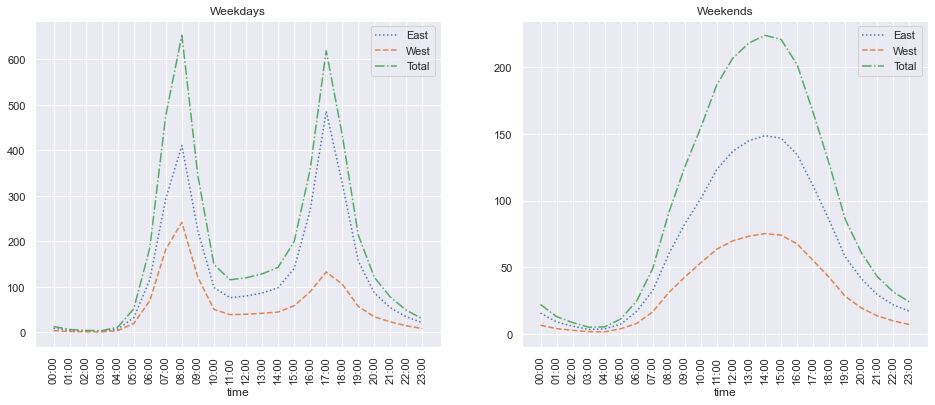

In [24]:
hourly_ticks = 60 * 60 * np.arange(24)
fig, ax = plt.subplots(1,2,figsize=(16,6))
gby_hourly.loc['weekday',:].plot(ax=ax[0], xticks=hourly_ticks, title='Weekdays', style=[':','--','-.'])
gby_hourly.loc['weekend',:].plot(ax=ax[1], xticks=hourly_ticks, title='Weekends', style=[':','--','-.'])


# plt.xticks(rotation=90) only affects the last subplot whose reference is active
# To change the xticks on every sub-plot
for x in ax:
    x.xaxis.set_tick_params(rotation=90)
    
# Observation: We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
# It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people’s commuting patterns

# Data Wrangling by merging Datasets (Fremont Bridge and Weather Data)

In [26]:
# Load Daily Weather data of Fremont Bridge
wd = pd.read_csv('D:\\1404899.csv', index_col='DATE', parse_dates=True)

In [27]:
wd.shape

(2097, 25)

In [28]:
fb_daily.shape # The number of days/rows match in both datasets - fb_daily and wd

(3224, 3)

In [29]:
wd.head(5)

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT02,WT03,WT04,WT05,WT08,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wd.columns

Index(['STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT08', 'WT13', 'WT14', 'WT16', 'WT18', 'WT22'],
      dtype='object')

In [31]:
wd[['STATION','NAME','PRCP','SNOW','TMAX','TMIN']].isnull().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
TMAX       0
TMIN       0
dtype: int64

In [32]:
wd = wd.filter(['STATION','NAME','PRCP','SNOW','TMAX','TMIN'], axis=1)
wd.head(5)

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,46
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,47
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,71,48
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46


In [33]:
# How Snowy days are recorded? how do the values look like?
np.sort( wd.SNOW.unique() ) # So the values range between 0 and 5.1

array([0. , 0.1, 0.4, 0.5, 0.6, 0.8, 1. , 1.1, 1.6, 2. , 2.9, 3. , 5.1])

In [34]:
np.sort( wd.PRCP.unique() ) # So the values range between 0 and 2.2

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.7 , 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.79,
       0.8 , 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.91, 0.93,
       0.94, 1.  , 1.03, 1.04, 1.05, 1.08, 1.09, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.18, 1.19, 1.2 , 1.21, 1.23, 1.26, 1.27, 1.28, 1.3 , 1.31,
       1.32, 1.35, 1.36, 1.4 , 1.5 , 1.51, 1.54, 1.61, 1.63, 1.7 , 1.71,
       1.74, 1.75, 1.84, 1.86, 2.13, 2.2 ])

In [35]:
wd.loc[ (wd['SNOW'] > 0) & (wd['PRCP'] == 0) ] # No rows available. So, the precipitation (PRCP) cannot be 0, when it Snows (SNOW > 0).

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,


In [36]:
# df = fb_daily['Total'].copy()
df = fb_daily.filter(['Total'], axis=1)
print('Shape : ',df.shape)
df.head(5)

Shape :  (3224, 1)


,Total
Date,
2012-10-03,10562.0
2012-10-04,10366.0
2012-10-05,9412.0
2012-10-06,6172.0
2012-10-07,6666.0


#### Feature Engineering : Categorical Values
* We saw previously that the patterns of use generally vary from day to day; let’s account for this in our data by adding binary columns that indicate the day of the week.
* Similarly, we might expect riders to behave differently on holidays; let’s add an indicator of this as well.

In [37]:
print(weekdays)
print(list(range(7)))

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
[0, 1, 2, 3, 4, 5, 6]


In [38]:
# Feature  Engineering : Categorical Values : adding binary columns that indicate the day of the week
for i in range(7):
    df[weekdays[i]] = (df.index.weekday ==  i).astype(int)
df.head(7)    

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0
2012-10-04,10366.0,0,0,0,1,0,0,0
2012-10-05,9412.0,0,0,0,0,1,0,0
2012-10-06,6172.0,0,0,0,0,0,1,0
2012-10-07,6666.0,0,0,0,0,0,0,1
2012-10-08,10732.0,1,0,0,0,0,0,0
2012-10-09,10520.0,0,1,0,0,0,0,0


In [39]:

df = df.rename(columns={'Total':'TotalBikesCount'})
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0
2012-10-04,10366.0,0,0,0,1,0,0,0
2012-10-05,9412.0,0,0,0,0,1,0,0
2012-10-06,6172.0,0,0,0,0,0,1,0
2012-10-07,6666.0,0,0,0,0,0,0,1


In [40]:
# Assuming, riders to behave differently on holidays.; we add an indicator for this by incorporating National Holiday Calendar:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018')
df = df.join(pd.Series(1, index=holidays, name='holiday'))
df['holiday'].fillna(0, inplace=True)
df.head()

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0,0.0
2012-10-04,10366.0,0,0,0,1,0,0,0,0.0
2012-10-05,9412.0,0,0,0,0,1,0,0,0.0
2012-10-06,6172.0,0,0,0,0,0,1,0,0.0
2012-10-07,6666.0,0,0,0,0,0,0,1,0.0


In [41]:
# df.drop(['holiday'], axis=1, inplace=True)
df['holiday'] = df['holiday'].astype(int)

In [42]:
df['holiday'].unique()

array([0, 1])

### Accounting for the Duration of Daylight

In [43]:
# We also suspect that the hours of daylight would affect how many people ride; 
# let’s use the standard astronomical calculation to add this information
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

<ipython-input-43-46bdee76ba7c>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


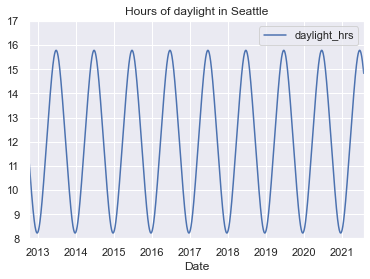

In [44]:
df['daylight_hrs'] = list(map(hours_of_daylight, df.index))
df[['daylight_hrs']].plot(fig=(16,4))
plt.ylim(8,17) # Increased y-axis limit max range by 1. Helps in placing the legend neatly without overlapping on the curve
plt.legend(loc='upper right')
plt.title('Hours of daylight in Seattle')
plt.show()
# Observation: The daylight varies between ~8 hrs (during Dececmber) and ~16 hrs (June).

In [45]:
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0,0,11.277359
2012-10-04,10366.0,0,0,0,1,0,0,0,0,11.219142
2012-10-05,9412.0,0,0,0,0,1,0,0,0,11.161038
2012-10-06,6172.0,0,0,0,0,0,1,0,0,11.103056
2012-10-07,6666.0,0,0,0,0,0,0,1,0,11.045208


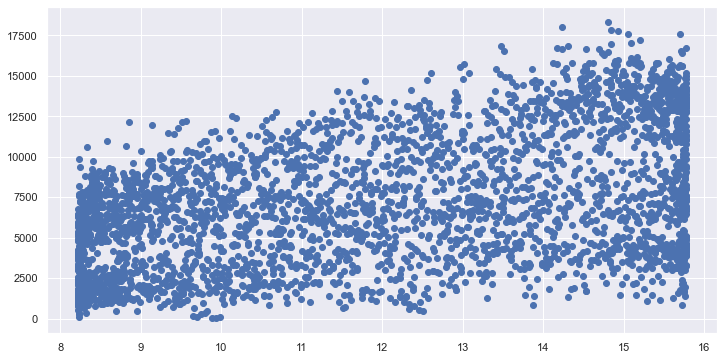

In [46]:
# Does day-light duration affect bicycle traffic? Let's validate that assumption with scatter plot.

# Plotting with Seaborn
# sns.lmplot('daylight_hrs','TotalBikesCount',data=df, fit_reg=False, size=5, scatter=True)

# plotting with Matplotlib
# plt.plot(df['daylight_hrs'],df['TotalBikesCount'])
plt.figure(figsize=(12,6)) # This should be set before drawing the plot
plt.scatter(df['daylight_hrs'],df['TotalBikesCount'])
plt.show()
# While see that our assumption turning out to be truthy, we see the plot too dense with data.

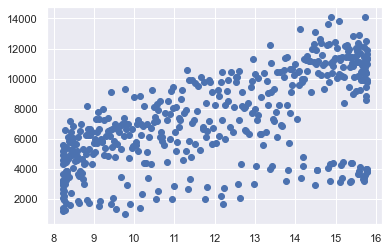

In [47]:
# Drawing the plot with resampled data
weekly = df.resample('W').mean()
# weekly.head()
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])
# So this clears the density to a large extent and we can see the trruthiness of our assumption - More daylight hours, more traffic

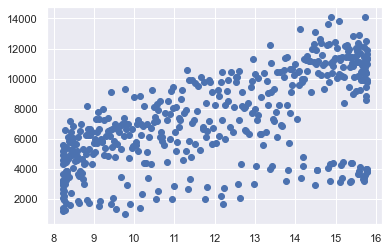

In [48]:
# sample = df.sample(n=500)
sample = df.sample(frac=0.1) # 10% of data ffrom the df
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])

In [49]:
# Can we see how the change in the duration affects the cycle traffic quantitatively?
# We can with LR's coefficient
from sklearn.linear_model import LinearRegression

x = sample[['daylight_hrs']]
y = sample['TotalBikesCount']
clf = LinearRegression(fit_intercept=True).fit(x, y)
ypred = clf.predict(x)
print(clf.coef_) # OP: ~295
# Now that means on any given day, each extra hour of daylight leads to about 300 more cyclers using the bridge

[726.89309897]


#### Now be a data scientist and ask yourself?

So is the seasonal increase daylight duration the real factor for the rise in bicyclers?
Or do we actually see a trend in the rise in bicyclers?
The way we can find answers to this is by doing a de-trending on the data. 

This is what I mean by "de-trended" data. We've basically removed the component of the data which correlates with the number of hours in a day, so that what is left is in some way agnostic to this quantity. The "adjusted weekly count" plotted here can be thought of as the number of cyclists we'd expect to see if the hours of daylight were not a factor.

**With the data de-trended, we get a better idea of how bicycling in Seattle has changed over time, corrected for the seasonal variation.**

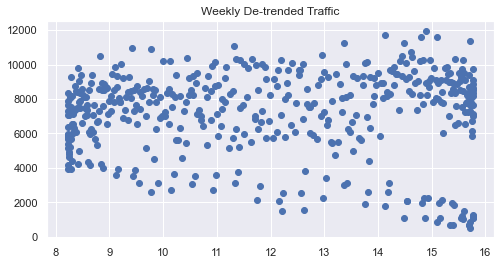

In [50]:
# Now that we have fit this trend, let's subtract it off and replace it by the mean:
trend = clf.predict(weekly[['daylight_hrs']]) # Trend is the weekly-predictions
detrended = trend.mean() + (weekly['TotalBikesCount'] - trend )
plt.figure(figsize=(8,4))
plt.scatter(weekly['daylight_hrs'],detrended)
plt.title('Weekly De-trended Traffic')
plt.show()

<AxesSubplot:xlabel='Date'>

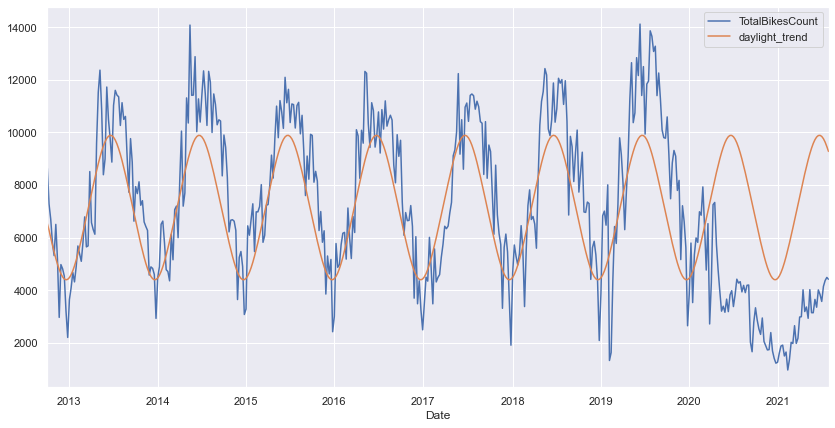

In [51]:
# Let's visualize this another way. in 2 steps.
# Step 1: Instead of plotting the number of riders vs daylight hours, 
# we'll again plot the number of riders vs the day of the year, along with the trend
weekly['daylight_trend'] = trend
weekly[['TotalBikesCount','daylight_trend']].plot(figsize=(14,7))

The STD of the detrended cyclists is 2455


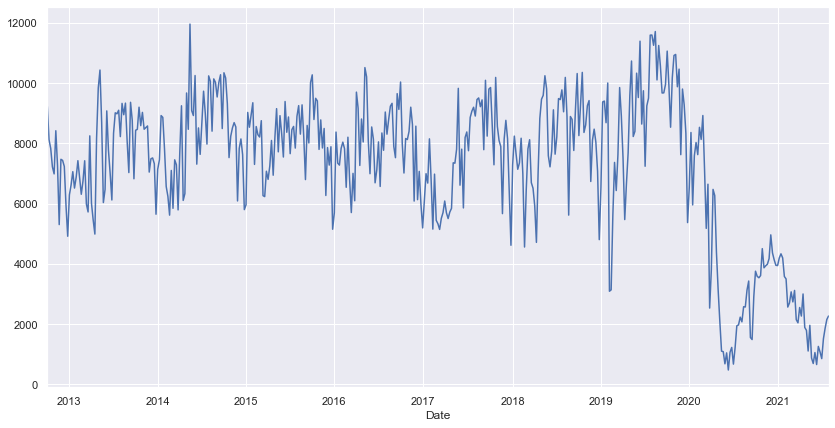

In [52]:
# Step 2: We can similarly view the adjusted total number of riders over time by subtracting this green line from the blue line:
detrended.plot(figsize=(14,7))
print('The STD of the detrended cyclists is {0:.0f}'.format(detrended.std()))

In [53]:
# Adding average temperature
# # temperatures are in 1/10 deg C; convert to C
tmin = wd['TMIN'] / 10
tmax = wd['TMAX'] / 10
wd['AvgTempInC'] = (tmin + tmax) / 2
df = df.join(wd['AvgTempInC'])
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC
Date,,,,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0,0,11.277359,5.60
2012-10-04,10366.0,0,0,0,1,0,0,0,0,11.219142,5.65
2012-10-05,9412.0,0,0,0,0,1,0,0,0,11.161038,5.95
2012-10-06,6172.0,0,0,0,0,0,1,0,0,11.103056,6.05
2012-10-07,6666.0,0,0,0,0,0,0,1,0,11.045208,6.05


In [54]:
# precip is in 1/10 mm; convert to inches
wd['PRCP_IN'] = wd['PRCP'] / 254
wd['DryDay'] = (wd['PRCP'] == 0).astype(int)
df = df.join(wd[['PRCP_IN','DryDay']])
df.head(15)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC,PRCP_IN,DryDay
Date,,,,,,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.000000,1.0
2012-10-04,10366.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.000000,1.0
2012-10-05,9412.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.000000,1.0
2012-10-06,6172.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.000000,1.0
2012-10-07,6666.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.000000,1.0
2012-10-08,10732.0,1,0,0,0,0,0,0,1,10.987503,5.80,0.000000,1.0
2012-10-09,10520.0,0,1,0,0,0,0,0,0,10.929950,5.45,0.000000,1.0
2012-10-10,9766.0,0,0,1,0,0,0,0,0,10.872560,5.05,0.000000,1.0
2012-10-11,9252.0,0,0,0,1,0,0,0,0,10.815345,5.10,0.000000,1.0


In [55]:
df = df.rename(columns={'daylight_hrs':'DayLightHrs'})
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay'],
      dtype='object')

In [56]:
# Finally, let’s add a counter that increases from day 1, and measures how many years have passed. 
# This will let us measure any observed annual increase or decrease in daily crossings:
df['YearsCount'] = (df.index - df.index[0]).days / 365.
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,10562.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1.0,0.000000
2012-10-04,10366.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1.0,0.002740
2012-10-05,9412.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1.0,0.005479
2012-10-06,6172.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1.0,0.008219
2012-10-07,6666.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1.0,0.010959


#### Persist Processed Data

In [57]:
df = df.reset_index()
df.head(5)

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,10562.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1.0,0.000000
1,2012-10-04,10366.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1.0,0.002740
2,2012-10-05,9412.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1.0,0.005479
3,2012-10-06,6172.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1.0,0.008219
4,2012-10-07,6666.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1.0,0.010959


In [58]:
df.to_csv('D:\\processed_data.csv')